In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# Read the data 

In [2]:
cookies = pd.read_csv('cookies.csv')

In [3]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


# Exploratory Data Analysis and Descriptive Statistics

## Describe and info 

In [4]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [5]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996907,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [6]:
cookies['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

#### findings from the above (and actions needed?)
- diameter is always the same - drop 
- -ve calories 
- -ve weight 
- bake temp high max - looks wrong 
- weird ph 
- aesthetic appeal mostly 3 
- some nulls: bake time (largest pop of nulls), sugar index, mixins 

## Correlation Matrix 

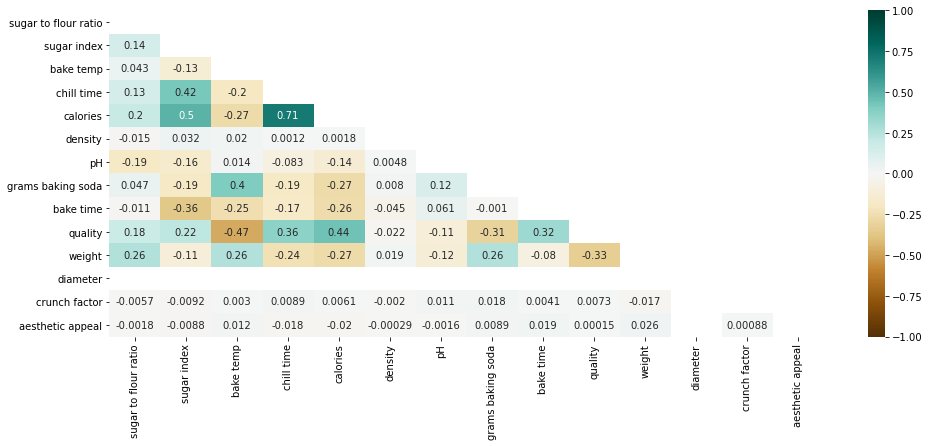

In [7]:
#heatmap corr matrix 
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool_))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

#### findings from the above (and actions needed?)
- 
- density limited impact on quality

## Bake time, Bake Temp, Quality 

In [8]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [9]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

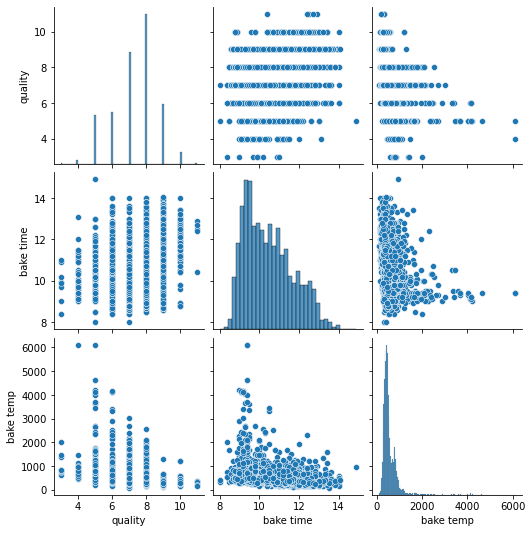

In [10]:
sns.pairplot(cookies[['quality', 'bake time', 'bake temp']]);

#### Thoughts on bake time and temp columns? : 

- could replace nulls with averages / drop - because they are spread across quality

## aesthetic appeal

In [11]:
cookies['aesthetic appeal'].value_counts()


3    5195
4       3
Name: aesthetic appeal, dtype: int64

#### Thoughts on aesthetic appeal column? : 

- drop this column

## diameter

In [12]:
cookies['diameter'].unique()

array([7])

#### Thoughts on diameter column : 

- drop this column

## Other columns - explore 

In [13]:
# chill time and calories similar impact on quality 
# in density - normally less than 1 but theres a 5 and a 3

# deal with non numerical data, drop remaining NAs


## Eliminate nulls

In [14]:
cookies = cookies.dropna()

In [15]:
cookies.reset_index(drop=True, inplace=True)

In [16]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5181 non-null   float64
 1   sugar index           5181 non-null   float64
 2   bake temp             5181 non-null   int64  
 3   chill time            5181 non-null   float64
 4   calories              5181 non-null   float64
 5   density               5181 non-null   float64
 6   pH                    5181 non-null   float64
 7   grams baking soda     5181 non-null   float64
 8   bake time             5181 non-null   float64
 9   quality               5181 non-null   int64  
 10  butter type           5181 non-null   object 
 11  weight                5181 non-null   float64
 12  diameter              5181 non-null   int64  
 13  mixins                5181 non-null   object 
 14  crunch factor         5181 non-null   float64
 15  aesthetic appeal     

In [17]:
cookies.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
diameter                  int64
mixins                   object
crunch factor           float64
aesthetic appeal          int64
dtype: object

## Deal with object types 

1) mixins 

In [18]:
def mixin_fixer(df):
    ingredients = ['raisins', 'nuts', 'oats', 'chocolate','peanut butter']
    #create columns for each ingredient
    for ingredient in ingredients:
        df[ingredient] = 0
    
    for x in ingredients:
        df[x]=df["mixins"].str.contains(x).astype(float)
    df.drop(["mixins"], axis=1, inplace=True)
    return df

In [19]:
mixin_fixer(cookies)

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,crunch factor,aesthetic appeal,raisins,nuts,oats,chocolate,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,1.30,3,1.0,0.0,0.0,0.0,0.0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,1.71,3,1.0,0.0,0.0,0.0,0.0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,1.78,3,0.0,1.0,0.0,1.0,0.0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,1.59,3,0.0,0.0,0.0,1.0,0.0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,1.30,3,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5176,0.66,2.0,390,15.0,88.0,0.99357,8.66,0.60,11.5,6,cubed,11.6,7,1.36,3,0.0,0.0,0.0,0.0,1.0
5177,0.16,1.5,490,10.0,97.0,0.99170,8.48,0.44,10.7,8,melted,10.0,7,1.80,3,1.0,0.0,0.0,0.0,0.0
5178,0.25,14.3,480,79.0,149.0,0.99750,8.12,0.37,9.7,7,melted,13.4,7,1.07,3,0.0,0.0,1.0,1.0,0.0
5179,0.33,1.4,560,35.0,136.0,0.99380,8.63,0.78,10.3,8,melted,13.8,7,1.77,3,0.0,0.0,0.0,1.0,0.0


2) butter type - get dummies

In [20]:
cookies=pd.get_dummies(cookies, columns=['butter type'])

In [21]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5181 non-null   float64
 1   sugar index           5181 non-null   float64
 2   bake temp             5181 non-null   int64  
 3   chill time            5181 non-null   float64
 4   calories              5181 non-null   float64
 5   density               5181 non-null   float64
 6   pH                    5181 non-null   float64
 7   grams baking soda     5181 non-null   float64
 8   bake time             5181 non-null   float64
 9   quality               5181 non-null   int64  
 10  weight                5181 non-null   float64
 11  diameter              5181 non-null   int64  
 12  crunch factor         5181 non-null   float64
 13  aesthetic appeal      5181 non-null   int64  
 14  raisins               5181 non-null   float64
 15  nuts                 

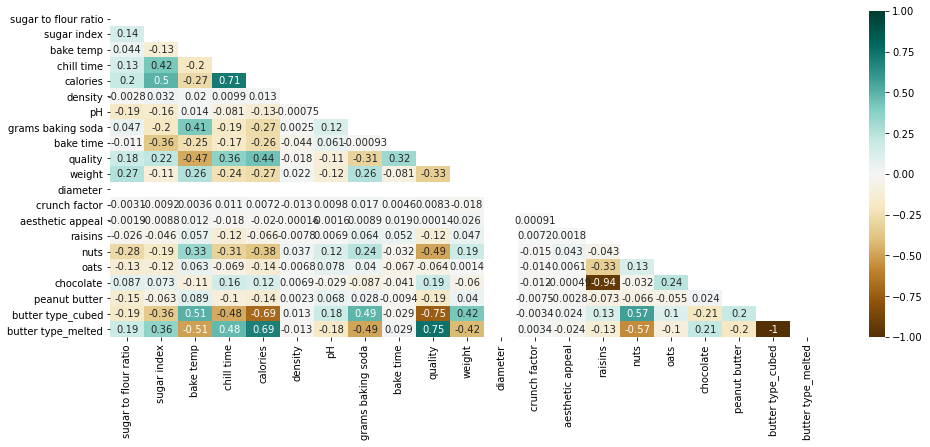

In [22]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(cookies.corr(), dtype=np.bool_))
heatmap = sns.heatmap(cookies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Feature Selection 

## Correlation to Quality

In [23]:
num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))

sugar to flour ratio --> 0.17992898765039814
sugar index --> 0.2199585681799637
bake temp --> -0.4708953237072917
chill time --> 0.36492489782981047
calories --> 0.4400803834300934
density --> -0.01752311822498871
pH --> -0.11372471128992208
grams baking soda --> -0.306251039857662
bake time --> 0.3154452163603215
quality --> 1.0
weight --> -0.32853394695701027
diameter --> nan
crunch factor --> 0.008345525940834762
aesthetic appeal --> 0.0001427068541878239
raisins --> -0.12339696536172716
nuts --> -0.4915861057407357
oats --> -0.06427594211076851
chocolate --> 0.1936479065011116
peanut butter --> -0.18717732441210813


### findings from the above (and actions needed?)
- 
- 

# Random Forest for feature selection 

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [25]:
cookies['quality'].unique()

array([ 8,  7,  9,  5,  3, 10,  6,  4, 11])

In [26]:
X=cookies.drop(columns=['quality'])
y=cookies['quality']

In [27]:
tree=RandomForestRegressor()

In [28]:
tree.fit(X,y)

RandomForestRegressor()

In [29]:
tree.feature_importances_

array([2.63936495e-02, 3.09567357e-02, 2.75885220e-02, 4.54177465e-02,
       3.22548461e-02, 2.70196497e-02, 3.05439404e-02, 3.62795998e-02,
       1.13012709e-01, 2.45610742e-02, 0.00000000e+00, 2.02881039e-02,
       2.36697297e-05, 2.35782898e-03, 9.22066684e-03, 9.54746898e-03,
       6.29384446e-03, 9.31675753e-04, 2.39317565e-01, 3.17990703e-01])

<BarContainer object of 20 artists>

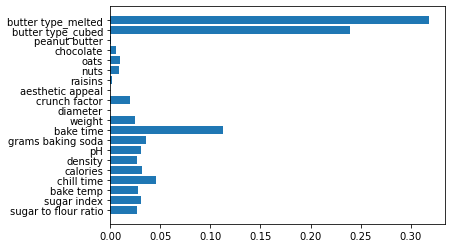

In [30]:
plt.barh(X.columns,tree.feature_importances_)

In [31]:
sorted_col=tree.feature_importances_.argsort()

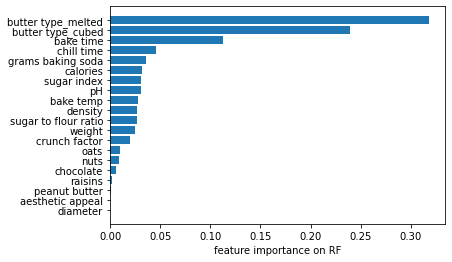

In [32]:
plt.barh(X.columns[sorted_col],tree.feature_importances_[sorted_col])
plt.xlabel("feature importance on RF");

## drop columns as needed 

In [33]:
cookies.drop(columns=["aesthetic appeal","diameter"], inplace=True)

In [34]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,raisins,nuts,oats,chocolate,peanut butter,butter type_cubed,butter type_melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,1.30,1.0,0.0,0.0,0.0,0.0,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,1.71,1.0,0.0,0.0,0.0,0.0,0,1
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,9.4,1.78,0.0,1.0,0.0,1.0,0.0,0,1
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,12.2,1.59,0.0,0.0,0.0,1.0,0.0,0,1
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,19.8,1.30,0.0,1.0,1.0,1.0,0.0,1,0


# Modeling 

## Split data into dependent and independent variables 

In [35]:
X= cookies.drop(columns="quality")
y=cookies.quality

##  Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Train test split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.1, random_state=40)


### get model, fit, make predictions  AND evaluate in the TRAIN 

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error # root 

In [39]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [40]:
predictions  = lm.predict(X_test)

In [41]:
len(predictions)

519

In [42]:
mse = mean_squared_error(y_test, predictions)
print(mse)

41.17832330288477


In [43]:
import math 
rmse = math.sqrt(mse)
print('our accuracy on train data only -after feature selection- is :',rmse)

our accuracy on train data only -after feature selection- is : 6.417033839936078


# Checks and balances - before doing other models 

In [44]:
len(X_train)

4662

In [45]:
len(y_train)

4662

In [46]:
len(X_test)

519

In [47]:
len(y_test)

519

# try other models to get better accuracy 

## Decision Tree 

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt=DecisionTreeRegressor(random_state=40)

In [50]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=40)

In [51]:
y_dt=dt.predict(X_test)

In [52]:
len(y_dt)

519

In [53]:
mse=mean_squared_error(y_test,y_dt)
rmse=math.sqrt(mse)
print('our accuracy with a decision tree-no hyper params is', rmse)

our accuracy with a decision tree-no hyper params is 0.8058074374217695


## Random forest regressor 

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf=RandomForestRegressor(random_state=40)

In [81]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=40)

In [82]:
y_rf=rf.predict(X_test)

In [83]:
len(y_rf)

519

In [84]:
mse=mean_squared_error(y_test,y_rf)
rmse=math.sqrt(mse)
print('our accuracy with a random forest -no hyper params is', rmse)

our accuracy with a random forest -no hyper params is 0.601750977499


## Lasso

In [96]:
from sklearn import linear_model

In [98]:
ls=linear_model.Lasso(random_state=40)

In [99]:
ls.fit(X_train,y_train)

Lasso(random_state=40)

In [100]:
y_ls=ls.predict(X_test)

In [101]:
len(y_ls)

519

In [102]:
mse=mean_squared_error(y_test,y_ls)
rmse=math.sqrt(mse)
print('our accuracy with a lasso -no hyper params is', rmse)

our accuracy with a lasso -no hyper params is 1.3254614311141995


## Gradient Boosting

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gb=GradientBoostingClassifier(random_state=40)

In [106]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=40)

In [108]:
y_gb=gb.predict(X_test)

In [109]:
len(y_gb)

519

In [110]:
mse=mean_squared_error(y_test,y_gb)
rmse=math.sqrt(mse)
print('our accuracy with a gradient boosting -no hyper params is', rmse)

our accuracy with a gradient boosting -no hyper params is 0.7765840918006015


## Extra Trees Classifier

In [132]:
from sklearn.ensemble import ExtraTreesClassifier

In [123]:
etc=ExtraTreesClassifier(random_state=40)

In [124]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(random_state=40)

In [125]:
y_etc=etc.predict(X_test)

In [126]:
len(y_etc)

519

In [127]:
mse=mean_squared_error(y_test,y_etc)
rmse=math.sqrt(mse)
print('our accuracy with a gradient boosting -no hyper params is', rmse)

our accuracy with a gradient boosting -no hyper params is 0.682847940768621


## Extra Trees regressor

In [131]:
from sklearn.ensemble import ExtraTreesRegressor

In [133]:
etr=ExtraTreesRegressor(random_state=40)

In [134]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(random_state=40)

In [136]:
y_etr=etr.predict(X_test)

In [137]:
len(y_etr)

519

In [138]:
mse=mean_squared_error(y_test,y_etr)
rmse=math.sqrt(mse)
print('our accuracy with a extra tree regressor -no hyper params is', rmse)

our accuracy with a gradient boosting -no hyper params is 0.5944316110956327


## Ada Boost Regressor

In [171]:
from sklearn.ensemble import AdaBoostRegressor

In [173]:
ab=AdaBoostRegressor(random_state=40)

In [174]:
ab.fit(X_train,y_train)

AdaBoostRegressor(random_state=40)

In [175]:
y_ab=ab.predict(X_test)

In [176]:
len(y_ab)

519

In [177]:
mse=mean_squared_error(y_test,y_ab)
rmse=math.sqrt(mse)
print('our accuracy with a extra tree regressor -no hyper params is', rmse)

our accuracy with a extra tree regressor -no hyper params is 0.743848973127153


## BaggingRegressor

In [145]:
from sklearn.ensemble import BaggingRegressor

In [146]:
br=BaggingRegressor(random_state=40)

In [147]:
br.fit(X_train,y_train)

BaggingRegressor(random_state=40)

In [148]:
y_br=br.predict(X_test)

In [149]:
len(y_br)

519

In [150]:
mse=mean_squared_error(y_test,y_br)
rmse=math.sqrt(mse)
print('our accuracy with a extra tree regressor -no hyper params is', rmse)

our accuracy with a extra tree regressor -no hyper params is 0.6275468340305241


## Stacked best of 

In [178]:
from sklearn.ensemble import StackingRegressor 

In [286]:
estimators_simple=[('br',BaggingRegressor()),
                   ('etr',ExtraTreesRegressor()),
                   ('rf',RandomForestRegressor(random_state=40,n_estimators=50)),
                  #('dt',DecisionTreeRegressor(random_state=40))]
                   ]
regr_stack_simple=StackingRegressor(estimators=estimators_simple)

In [287]:
regr_stack_simple.fit(X_train,y_train)

StackingRegressor(estimators=[('br', BaggingRegressor()),
                              ('etr', ExtraTreesRegressor()),
                              ('rf',
                               RandomForestRegressor(n_estimators=50,
                                                     random_state=40))])

In [288]:
y_best=regr_stack_simple.predict(X_test)

In [289]:
len(y_best)

519

In [290]:
mse=mean_squared_error(y_test,y_best)
rmse=math.sqrt(mse)
print('our accuracy with a stacked dt and lt model -no hyper params is', rmse)

our accuracy with a stacked dt and lt model -no hyper params is 0.586325405217442


In [215]:
0.586325405217442
0.5886872579228963 # random forest 500
0.5870499017584692 # with  bag
0.5920325957527964 # swap
0.5875205416846112 # no bag
0.5862736123182805 # no bag
0.5880418931799646
0.5878228129891008
0.5873035206234934 # no bag

0.5873035206234934

# Make predictions on the cookies_test dataset (without labels)

In [60]:
cookies_test = pd.read_csv('cookies_test.csv')

In [61]:
cookies_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    779 non-null    int64  
 1   sugar to flour ratio  779 non-null    float64
 2   sugar index           779 non-null    float64
 3   bake temp             779 non-null    float64
 4   chill time            779 non-null    float64
 5   calories              779 non-null    float64
 6   density               779 non-null    float64
 7   pH                    779 non-null    float64
 8   grams baking soda     779 non-null    float64
 9   bake time             779 non-null    float64
 10  quality               779 non-null    int64  
 11  butter type           779 non-null    object 
 12  weight                779 non-null    float64
 13  diameter              779 non-null    int64  
 14  mixins                779 non-null    object 
 15  crunch factor         7

In [62]:
cookies_test['quality'].value_counts()

0    779
Name: quality, dtype: int64

In [63]:
cookies.shape

(5181, 19)

In [64]:
cookies_test.shape

(779, 17)

In [65]:
# drop any columns you excluded from the training data 
# reshape data matching steps you had for train data (eg object types)

In [66]:
# drop columns first 
cookies_test.drop(columns=["aesthetic appeal","diameter"], inplace=True)

In [67]:
# fix object types 
# mixins 
mixin_fixer(cookies_test)

,id,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,raisins,nuts,oats,chocolate,peanut butter
0,14,0.62,19.25,400.0,41.0,172.0,1.00020,7.98,0.67,9.7,0,melted,16.6,1.85,0.0,1.0,0.0,1.0,0.0
1,26,0.35,1.00,520.0,35.0,146.0,0.99300,8.45,0.44,10.0,0,melted,13.8,1.43,0.0,0.0,0.0,1.0,0.0
2,30,0.39,10.40,440.0,20.0,142.0,0.99740,8.20,0.53,10.0,0,melted,17.0,1.57,0.0,0.0,0.0,1.0,0.0
3,52,0.33,1.10,570.0,21.0,82.0,0.99100,8.32,0.46,10.9,0,melted,12.4,1.44,0.0,0.0,1.0,1.0,0.0
4,100,0.37,13.50,600.0,52.0,192.0,0.99750,8.00,0.44,9.1,0,melted,14.8,1.51,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1442,0.02,1.90,780.0,18.0,30.0,0.99712,8.40,0.75,9.8,0,cubed,13.8,1.01,0.0,1.0,1.0,1.0,0.0
775,1445,0.19,5.20,940.0,19.0,98.0,0.99713,8.16,0.52,9.6,0,cubed,14.8,1.68,0.0,1.0,1.0,0.0,0.0
776,1461,0.00,2.10,600.0,6.0,13.0,0.99664,8.59,0.61,10.0,0,cubed,12.4,1.38,0.0,1.0,1.0,0.0,0.0
777,1467,0.08,2.30,670.0,19.0,32.0,0.99648,8.52,0.57,11.0,0,cubed,13.4,1.63,0.0,0.0,0.0,0.0,1.0


In [68]:
# butter 
cookies_test=pd.get_dummies(cookies_test, columns=['butter type'])

In [69]:
cookies_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    779 non-null    int64  
 1   sugar to flour ratio  779 non-null    float64
 2   sugar index           779 non-null    float64
 3   bake temp             779 non-null    float64
 4   chill time            779 non-null    float64
 5   calories              779 non-null    float64
 6   density               779 non-null    float64
 7   pH                    779 non-null    float64
 8   grams baking soda     779 non-null    float64
 9   bake time             779 non-null    float64
 10  quality               779 non-null    int64  
 11  weight                779 non-null    float64
 12  crunch factor         779 non-null    float64
 13  raisins               779 non-null    float64
 14  nuts                  779 non-null    float64
 15  oats                  7

In [70]:
cookies_test.drop(columns=["id"], inplace=True)

## split y from X 

In [71]:
X_test_test= cookies_test.drop(columns="quality")
y_test_test=cookies_test.quality

## Scale the X

In [72]:
X_test_test_scaled = scaler.fit_transform(X_test_test)

## predict the test array 

- you dont need to train again, or do a traintest split this time.
- you just apply your chosen model to the cookies_test data set 

In [73]:
predictions_test_test=dt.predict(X_test_test_scaled)

In [74]:
predictions_test_test

array([ 7.,  8.,  5., 10.,  8.,  8.,  9.,  6.,  7.,  7.,  8.,  9.,  7.,
        8.,  7.,  8.,  9.,  8.,  6.,  7.,  8.,  7., 10.,  7.,  7.,  7.,
        7.,  8.,  7.,  7.,  8.,  8.,  8.,  7., 10.,  7.,  8.,  9.,  7.,
        7., 10.,  9.,  8.,  9.,  7.,  8.,  7.,  7.,  7.,  9.,  8.,  9.,
        8.,  9.,  8.,  7.,  9.,  9.,  8.,  8.,  8.,  8.,  6.,  8.,  7.,
        7.,  7.,  7.,  8.,  8.,  8.,  9.,  6.,  7.,  8.,  6.,  9.,  6.,
        8.,  7.,  8.,  7.,  8.,  8.,  7.,  8.,  8.,  8.,  9.,  7.,  7.,
        8.,  8.,  8.,  8.,  9.,  8.,  8.,  5.,  8., 10.,  8., 10.,  9.,
        9.,  8.,  7.,  7.,  8.,  8.,  6.,  7.,  7.,  7.,  7.,  8.,  7.,
        7.,  9.,  5.,  8.,  7.,  7.,  8.,  7.,  7.,  8.,  8.,  7.,  7.,
        7.,  8., 10.,  6.,  8.,  9.,  8.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  9., 10.,  7.,  8.,  7.,  8.,  7.,  8.,
        7.,  7.,  9., 10.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  7.,  8.,
        7.,  9.,  8.,  7.,  8.,  8.,  7.,  8.,  8.,  8., 10.,  6

In [75]:
len(predictions_test_test)
# check there are 799 

779

# send your array to the teaching team for validation RMSE